Test Jupyter notebook used to look at Marcus theory examined previously by Prenay. 

In [1]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const mev2J = 1.6*10^(-19)*10^(-3)
const nm2au = 18.897

print(mev2au)

3.6751357780000004e-5

In [2]:
using OrdinaryDiffEq
using DelimitedFiles
using LinearAlgebra
using Sundials

In [3]:
function Y6UpconversionDimerHamiltonianWTriplet(soc::Float64, Vct::Float64)

    # Params from Samuele paper

    # D1 dimer dynamics - FE vs CT character over time.

    reorg = [157.0, 157.0, 240.0, 240.0, 157.0]*mev2au
    #reorg got from Table S1 from Samuelle paper. 157mev comes from exciton and 240ev comes from average of cation and anion. 
    #Obviously would be good to calculate our own values for these. Think these are only calculated for one molecule and not for the dimer complex. 
    #Would be good to calculate more accurate reorganisation energies 

    cutoff = repeat([1600 * invcm2au], 5)

    #Efe = 2046.0
    Ect(r) = (2.19 -  4.959/(r))*1000  # Enter r in angstrom ; best fit equation for Ect
    #Equation comes from Eq. S10 of the supplementary information coverted energy into mev. epsilon taken as 2.9 
    Dh = 55.7
    De = 72.0
    V = -76.0
    #Values taken from S3 table using First Dimer molecule. Question of whether any difference is seen if other Dimer values are used. 

    Ec = Ect(9.29)

    # Dimer Hamiltonian with singlet and CT states

    #=H0 = Matrix{ComplexF64}([

        Dh De Ec 0.0
        De Dh 0.0 Ec
    ]) * mev2au =#


    # Dimer Hamiltonian including triplet with placeholder SoC

    # Zhenghan singlet values could calculate more accurately. Suggestion I could calculate for each of the Dimers the energies individually. 

    Efe1 = 1872.0
    Efe2 = 1886.0

    # Zhenghan triplet values could calculate more accurately. Suggestion I could calculate for each of the Dimers the energies individually. 
    Et1 = 1350.0
    Et2 = 1393.0

    #Ett = Et1 + Et2

    Ett = 2000.0

    H0 = Matrix{ComplexF64}([
        Efe1 V Dh De soc 
        V Efe2 De Dh soc 
        Dh De Ec 0.0 Vct 
        De Dh 0.0 Ec Vct 
        soc soc Vct Vct Ett
    ]) *mev2au


    return reorg, cutoff, H0
end

Y6UpconversionDimerHamiltonianWTriplet (generic function with 1 method)

In [4]:
Marcus(V, ΔE, β, λ) =2*pi*((V^2 * sqrt(β))/sqrt(4*π*λ))*exp(-1*β*(λ+ΔE)^2/(4*λ))
1/(4.136*10^-12*mev2au)
#Marcus theory equation is incorrect in his code. Forgot to square the energy term. Has been corrected above 
#Note that when using this rate constant we using time in atomic units. This is fine but when comparing to other values in literature 
#times by 1/(4.136*10^-12*mev2au) term above. 

#Hamiltonian generated is correct in his code beside caveat on better ways to calculate quantities in equation. 
λ, γ, H = Y6UpconversionDimerHamiltonianWTriplet(71.0, 162.0)


#Issue comes with his Marcus Theory equations that he does not calculate different rates for forward and reverse reactions.
#Below different rates are calculated for forward and reverse reactions. 
#Have done this below and slightly redifined the constants differently. 

β = 1052.0
const kf1f2 = Marcus(real.(H[1,2]), real.(H[1,1] - H[2,2]), β, λ[1])
const kf2f1 = Marcus(real.(H[1,2]), real.(H[1,1] - H[2,2]), β, λ[1])
const kfc1 = Marcus(real.(H[1,3]), real.(H[1,1] - H[3,3]), β, λ[3])
const kcf1 = Marcus(real.(H[1,3]), real.(H[3,3] - H[1,1]), β, λ[3])
const kfc2 = Marcus(real.(H[2,3]), real.(H[2,2] - H[3,3]), β, λ[3])
const kcf2 = Marcus(real.(H[2,3]), real.(H[3,3] - H[2,2]), β, λ[3])
const kct = Marcus(real.(H[4,5]), real.(H[4,4] - H[5,5]), β, λ[3])
const ktc = Marcus(real.(H[4,5]), real.(H[5,5] - H[4,4]), β, λ[3])
const kft1 = Marcus(real.(H[1,5]), real.(H[1,1] - H[5,5]), β, λ[5])
const ktf1 = Marcus(real.(H[1,5]), real.(H[5,5] - H[1,1]), β, λ[5])
const kft2 = Marcus(real.(H[2,5]), real.(H[2,2] - H[5,5]), β, λ[5])
const ktf2 = Marcus(real.(H[2,5]), real.(H[5,5] - H[2,2]), β, λ[5])

println(kf1f2, "\n Couping between FE1 +FE2 states")
println(kf2f1, "\n Couping between FE2 and FE1 states")
println(kfc1, "\n Couping between FE1 and CT states")
println(kcf1, "\n Couping between CT and FE1 states")
println(kfc2, "\n Couping between FE2 and CT states")
println(kcf2, "\n Couping betwee CT and FE2 states")
println(kct, "\n Couping between CT and triplet states")
println(ktc, "\n Couping between triplet and CT states")
println(kft1, "\n Couping between FE1 and triplets states")
println(ktf1, "\n Couping between triplets and FE1 states")
println(kft2, "\n Couping between FE2 and triplets states")
println(ktf2, "\n Couping between triplets and FE2 states")






0.0016765786237618486
 Couping between FE1 +FE2 states
0.0016765786237618486
 Couping between FE2 and FE1 states
5.961920787918113e-7
 Couping between FE1 and CT states
0.0025052688621312862
 Couping between CT and FE1 states
5.911422818832416e-7
 Couping between FE2 and CT states
0.0042680792320404165
 Couping betwee CT and FE2 states
0.014059430987154372
 Couping between CT and triplet states
2.3728323477505632e-8
 Couping between triplet and CT states
0.0048929850137793465
 Couping between FE1 and triplets states
3.470094761164756e-5
 Couping between triplets and FE1 states
0.0045985712530867235
 Couping between FE2 and triplets states
5.6035426188869665e-5
 Couping between triplets and FE2 states


In [5]:
#Function whoses differential equations we plan to solve. 
#NB Different rates for forward and reverse reactions have been used. Calculated on previous Jupyter notebook 

function func_semi2!(du, u, p, t)
    du[1]=-(kf1f2 + 2*kfc1 + kft1)*u[1]+kf2f1*u[2]+kcf1*u[3]+kcf1*u[4]+ktf1*u[5]
    du[2]=kf1f2*u[1] -(kf2f1 + 2*kfc2 + kft2)*u[2]+ kcf2*u[3]+ kcf2*u[4]+ ktf2*u[5]
    du[3]=kfc1*u[1]+kfc2*u[2] -(kcf1+kcf2 + kct)*u[3]+ ktc*u[5]
    du[4]=kfc1*u[1]+kfc2*u[2]  -(kcf1+kcf2 + kct)*u[4]+ ktc*u[5]
    du[5]=kft1*u[1]+kft2*u[2]+kct*u[3]+kct*u[4] -(ktf1+ktf2 + 2*ktc)*u[5]
end


func_semi2! (generic function with 1 method)

In [6]:
#Code used to solve the ODE problem. Could have alternatively solved using Matrix method. 
p0=[1;0;0;0;0]
tspan = (0.0, 1000)
prob = ODEProblem(func_semi2!, p0, tspan, saveat=0.1)
sol = solve(prob, Tsit5())
t = sol.t
ps = sol.u
P_1_array=[]
P_2_array=[]
P_3_array=[]
P_4_array=[]
P_5_array=[]
for t_idx in range(1, length(t))
        Pop=ps[t_idx]
        push!(P_1_array, Pop[1])
        push!(P_2_array, Pop[2])
        push!(P_3_array, Pop[3])
        push!(P_4_array, Pop[4])
        push!(P_5_array, Pop[5])
end
println(P_1_array)
println(P_2_array)


Any[1.0, 0.9993431551338394, 0.9986867715132404, 0.9980308487987117, 0.9973753866510217, 0.9967203847311957, 0.9960658427005178, 0.9954117602205296, 0.9947581369530307, 0.9941049725600788, 0.9934522667037808, 0.9928000190461603, 0.9921482292501214, 0.9914968969788582, 0.9908460218958147, 0.990195603664684, 0.9895456419494085, 0.9888961364141802, 0.9882470867234404, 0.98759849254188, 0.9869503535344389, 0.9863026693663068, 0.9856554397029227, 0.9850086642099748, 0.9843623425534008, 0.9837164743993881, 0.9830710594143731, 0.9824260972650417, 0.9817815876183293, 0.9811375301414208, 0.9804939245017503, 0.9798507703670012, 0.9792080674051067, 0.9785658152842489, 0.9779240136728599, 0.9772826622396206, 0.9766417606534616, 0.9760013085835632, 0.9753613056993543, 0.974721751670514, 0.9740826461669705, 0.9734439888589013, 0.9728057794167333, 0.972168017511143, 0.9715307028130562, 0.970893834993648, 0.9702574137243432, 0.9696214386768156, 0.9689859095229887, 0.9683508259350353, 0.967716187585377

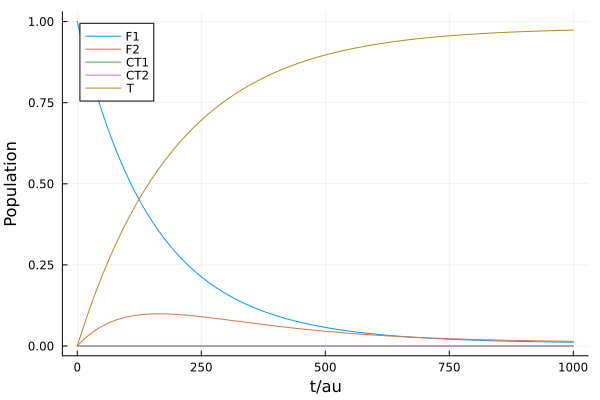

In [7]:
#Code used to plot data generated from ODE method solving Marcus theory 
using Plots
y1=P_1_array
y2=P_2_array
y3=P_3_array
y4=P_4_array
y5=P_5_array
plot(t, [y1, y2, y3, y4, y5], label=["F1" "F2" "CT1" "CT2" "T"])
xlabel!("t/au")
ylabel!("Population")

